<a href="https://colab.research.google.com/github/sergiobm3/ESI_MachineLearning/blob/NLP/SSJ_Task2_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> We are the SSJ team and this is our work about natural language processing.

---

In [2]:
import io
import pandas as pd
from google.colab import files
import re

## 0. Loading Data

We start by loading the data file that contains the tweets with which the study will work. The file format to upload is CSV.

For this purpose, we use some commands provided by Google Colab itself to access files on our computer.

In [3]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')),sep=',')

df

Saving labeled_data.csv to labeled_data.csv
User uploaded file "labeled_data.csv" with length 2546446 bytes


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


3 classes: 0 --> hate speech, 1 --> offensive language, 2 --> neither

# 1. Preprocessing

Before starting, it is necessary to preprocess the tweet field of the dataset that is provided to us, in order to work in a more efficient and accurate way.

## Remove unuseful data

Some symbols that do not provide information have been eliminated.

In [4]:
pattern = "\"#$%&'()*+, -./:;<=>?@[\]^_`{|}~“”…»’"

def cleanUnusefulData(sentence):
  sentence = sentence.translate(str.maketrans('', '', pattern))
  return sentence

def removeUnusefulExclamation(sentence):
  if sentence[0] == '!':
    sentence = removeUnusefulExclamation(sentence[1:])
  else:
    return sentence
  return sentence

clean_tweet = []
for t in range(0,len(df)):
  tweet = df.iloc[t]['tweet']
  tweet = removeUnusefulExclamation(tweet)
  clean_tweet.append(tweet)

df['clean_tweet'] = clean_tweet


## Replace emoticons

We replace the emoticons with words that resemble what they want to express. You must upload the emoticons.txt file.

In [6]:
dict_emoticons = {}
with open('emoticons.txt') as f:
    for linea in f:
      info = linea.split(",")
      emoticon_code = info[0]
      emoticon_word = info[2]
      dict_emoticons[emoticon_code] = emoticon_word[:len(emoticon_word)-1]
print(dict_emoticons)

def replaceEmoticon(word):
  if word in dict_emoticons:
    word = word.replace(str(word),dict_emoticons[word])
  return word

def replaceUnknownEmoticon(word):
  m = re.match(r"\\[u][A-Za-z0-9]*",word)
  if m is not None:
    word = ""
  return word

val = '😀'.encode('unicode-escape').decode('ASCII')
print(val.encode('ASCII').decode('unicode-escape'))

{'😀': 'smile', '😁': 'smile', '😂': 'laugh', '😃': 'smile', '😄': 'smile', '😆': 'smile', '😉': 'wink', '😊': 'smile', '😒': 'unamused', '😕': 'confused', '😗': 'kiss', '😘': 'kiss', '😙': 'kiss', '😚': 'kiss', '😞': 'dissapointed', '😟': 'worried', '😠': 'angry', '😡': 'angry', '😢': 'sad', '😨': 'frightened', '😪': 'sleepy', '😫': 'tired', '😭': 'sad', '😮': 'surprised', '😯': 'surprised', '😱': 'frightened', '😲': 'astonished', '😳': 'flushed', '😴': 'sleepy', '😵': 'confused', '😶': 'quiet', '🤐': 'quiet', '🤒': 'ill', '🤔': 'thoughtful', '🤡': 'clown', '🤢': 'sucks', '🤣': 'laugh', '\U0001f92c': 'angry', '\U0001f92e': 'sucks', '\U0001f92f': 'astonished'}
😀


## Remove contractions
 
A dictionary containing the most common contractions has been implemented, to return instead the "expanded form" of expressing them.

In [7]:
dict_contractions = {'aren\'t':'are not', 'can\'t':'can not', 'couldn\'t':'could not', 'didn\'t':'did not', 'don\'t':'do not', 'doesn\'t':'does not', 'hadn\'t':'had not',
                       'haven\'t':'have not', 'he\'s':'he is', 'he\'ll':'he will', 'he\'d':'he would', 'here\'s':'here is', 'i\'m':'i am', 'i\'ve':'i have', 'i\'ll':'i will',
                       'i\'d':'i would', 'isn\'t':'is not','it\'s':'it is', 'it\'ll':'it will', 'mustn\'t':'must not', 'she\'s':'she is', 'she\'ll':'she will', 'she\'d':'she would',
                       'shouldn\'t':'should not', 'that\'s':'that is', 'there\'s':'there is', 'they\'re':'they are', 'they\'ve':'they have', 'they\'ll':'they will', 'they\'d':'they would',
                       'they\'d':'they had', 'wasn\'t':'was not', 'we\'re':'we are', 'we\'re':'we are', 'we\'ve':'we have', 'we\'ll':'we will', 'we\'d':'we would', 'weren\'t':'were not', 'what\'s':'what is',
                       'where\'s':'where is', 'who\'s':'who is', 'who\'ll':'who will', 'won\'t':'will not', 'wouldn\'t':'would not', 'you\'re': 'you are', 'you\'ve': 'you have', 
                       'you\'ll':'you will', 'you\'d':'you would', 'y\'all': 'you all', 'could\'ve': 'could have', 'hasn\'t': 'has not', 'let\'s': 'let us'}

def remove_contractions(word):
  return word.replace(word,dict_contractions[word])
  
def is_remove_contractions(word):
  if word in dict_contractions:
    return True    
  else:
    return False

## Executing preprocessing

All the functions defined above will be executed. And other preprocessing steps that have not needed to be defined in a separate function, such as deleting all capital letters.

In [8]:
# We create a new dataframe to save result in different columns
df_result = pd.DataFrame()

In [9]:
###### EXECUTING PREPROCESSING WITHOUT EMOTICONS ######
!pip install tweet-preprocessor

import preprocessor as p
import nltk
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer

p.set_options(p.OPT.EMOJI, p.OPT.URL,p.OPT.HASHTAG, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.ESCAPE_CHAR, p.OPT.RESERVED, p.OPT.NUMBER)
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

# Each sentence of tweet
sentences = []
for tweet in df['clean_tweet']:
    result = tknzr.tokenize(tweet)
    list_token = []
    for word in result:
      # Change emoticon for text
      token = replaceEmoticon(word)
      token = replaceUnknownEmoticon(token.encode('unicode-escape').decode('ASCII'))

      if token == "": 
        pass
      else: token = token.encode('ASCII').decode('unicode-escape')

      # Clean hashtag and mentions
      token = p.clean(token)

      # Remove the capital letters, if the word is not capitalized entirely.
      if not token.isupper():
        token = token.lower()
      if token.isupper() and len(token)==1:
        token = token.lower()

      if is_remove_contractions(token): # Remove contractions
        token = remove_contractions(token)
        token = token.split(" ")
        list_token.append(token[0])
        list_token.append(token[1])
      else: # Clean unuseful data (",_,...)
        token = cleanUnusefulData(token)
        if(token is not ""):
          list_token.append(token)
      
    sentences.append(list_token)

df_result['preprocessing_without_emoticons'] = sentences
df_result

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,preprocessing_without_emoticons
0,"[as, a, woman, you, should, not, complain, abo..."
1,"[boy, dats, cold, tyga, dwn, bad, for, cuffin,..."
2,"[dawg, !, !, !, you, ever, fuck, a, bitch, and..."
3,"[she, look, like, a, tranny]"
4,"[the, shit, you, hear, about, me, might, be, t..."
...,...
24778,"[yous, a, muthaf, in, lie, right, !, his, TL, ..."
24779,"[you, have, gone, and, broke, the, wrong, hear..."
24780,"[young, buck, wanna, eat, !, !, dat, nigguh, l..."
24781,"[youu, got, wild, bitches, tellin, you, lies]"


In [10]:
###### EXECUTING PREPROCESSING WITH EMOTICONS ######
!pip install tweet-preprocessor

import preprocessor as p
import nltk
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer

p.set_options(p.OPT.URL,p.OPT.HASHTAG, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.ESCAPE_CHAR, p.OPT.RESERVED, p.OPT.NUMBER)
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

# Each sentence of tweet
sentences = []
for tweet in df['clean_tweet']:
    result = tknzr.tokenize(tweet)
    list_token = []
    for word in result:
      # Change emoticon for text
      token = p.clean(word)
      token = replaceUnknownEmoticon(token.encode('unicode-escape').decode('ASCII'))

      if token == "":
        pass
      else: token = token.encode('ASCII').decode('unicode-escape')

      # Remove the capital letters, if the word is not capitalized entirely.
      if not token.isupper():
        token = token.lower()
      if token.isupper() and len(token)==1:
        token = token.lower()

      if is_remove_contractions(token): # Remove contractions
        token = remove_contractions(token)
        token = token.split(" ")
        list_token.append(token[0])
        list_token.append(token[1])
      else: # Clean unuseful data (",_,...)
        token = cleanUnusefulData(token)
        if(token is not ""):
          list_token.append(token)
    
    sentences.append(list_token)

df_result['preprocessing_with_emoticons'] = sentences
df_result

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,preprocessing_without_emoticons,preprocessing_with_emoticons
0,"[as, a, woman, you, should, not, complain, abo...","[as, a, woman, you, should, not, complain, abo..."
1,"[boy, dats, cold, tyga, dwn, bad, for, cuffin,...","[boy, dats, cold, tyga, dwn, bad, for, cuffin,..."
2,"[dawg, !, !, !, you, ever, fuck, a, bitch, and...","[dawg, !, !, !, you, ever, fuck, a, bitch, and..."
3,"[she, look, like, a, tranny]","[she, look, like, a, tranny]"
4,"[the, shit, you, hear, about, me, might, be, t...","[the, shit, you, hear, about, me, might, be, t..."
...,...,...
24778,"[yous, a, muthaf, in, lie, right, !, his, TL, ...","[yous, a, muthaf, in, lie, right, !, his, TL, ..."
24779,"[you, have, gone, and, broke, the, wrong, hear...","[you, have, gone, and, broke, the, wrong, hear..."
24780,"[young, buck, wanna, eat, !, !, dat, nigguh, l...","[young, buck, wanna, eat, !, !, dat, nigguh, l..."
24781,"[youu, got, wild, bitches, tellin, you, lies]","[youu, got, wild, bitches, tellin, you, lies]"


## Correct Wrong Words

With the following functions it is possible to implement a word corrector, which will use the big.txt file to correct the words of the tweets. Therefore, the big.txt file needs to be loaded.

In [11]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

⚠️⚠️ **¡¡¡ NO EXECUTE !!!** ⚠️⚠️

Using the following piece of code, we correct all the words in the tweets. However, the execution time is approximately 30 minutes. 

Therefore, we have provided the resulting CSV separately. You can run it in the following part of code.

In [ ]:
########## ⚠️ HIGH EXECUTION TIME ⚠️ ##########
df_correct_words = pd.DataFrame(columns=['preprocessing_with_emoticons','preprocessing_without_emoticons'])

listaTweetsWithout = []
for i in range(0,len(df_result['preprocessing_without_emoticons'])):
  listaTweet = []
  for j in range(0,len(df_result['preprocessing_without_emoticons'][i])):
    listaTweet.append(correction(df_result['preprocessing_without_emoticons'][i][j]))
  listaTweetsWithout.append(listaTweet)

listaTweetsWith = []
for i in range(0,len(df_result['preprocessing_with_emoticons'])):
  listaTweet = []
  for j in range(0,len(df_result['preprocessing_with_emoticons'][i])):
    listaTweet.append(correction(df_result['preprocessing_with_emoticons'][i][j]))
  listaTweetsWith.append(listaTweet)

df_correct_words['preprocessing_without_emoticons'] = listaTweetsWithout
df_correct_words['preprocessing_with_emoticons'] = listaTweetsWith
df_correct_words

df_correct_words.to_csv('df_correct_words.csv')
################################################

✔️✔️ **EXECUTE THIS** ✔️✔️

You need to have the file df_correct_words.csv uploaded

In [12]:
pd.read_csv('df_correct_words.csv', sep=',', index_col=0)

,preprocessing_with_emoticons,preprocessing_without_emoticons
0,"['as', 'a', 'woman', 'you', 'should', 'not', '...","['as', 'a', 'woman', 'you', 'should', 'not', '..."
1,"['boy', 'days', 'cold', 'tea', 'down', 'bad', ...","['boy', 'days', 'cold', 'tea', 'down', 'bad', ..."
2,"['dawn', 'a', 'a', 'a', 'you', 'ever', 'fuck',...","['dawn', 'a', 'a', 'a', 'you', 'ever', 'fuck',..."
3,"['she', 'look', 'like', 'a', 'tyranny']","['she', 'look', 'like', 'a', 'tyranny']"
4,"['the', 'shit', 'you', 'hear', 'about', 'me', ...","['the', 'shit', 'you', 'hear', 'about', 'me', ..."
...,...,...
24778,"['you', 'a', 'mutual', 'in', 'lie', 'right', '...","['you', 'a', 'mutual', 'in', 'lie', 'right', '..."
24779,"['you', 'have', 'gone', 'and', 'broke', 'the',...","['you', 'have', 'gone', 'and', 'broke', 'the',..."
24780,"['young', 'buck', 'anna', 'eat', 'a', 'a', 'da...","['young', 'buck', 'anna', 'eat', 'a', 'a', 'da..."
24781,"['you', 'got', 'wild', 'birches', 'telling', '...","['you', 'got', 'wild', 'birches', 'telling', '..."


## Stop words

A stop word is a word in common use, which does not provide information. It does not influence when expressing feelings of hatred. Therefore, we eliminate them.

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

english_stops = set(stopwords.words('english'))
clear_sent_emoticon = []
clear_sent_not_emoticon = []
for tweet in range(0,len(df_result['preprocessing_with_emoticons'])):
  clear_sent_emoticon.append([word for word in df_result['preprocessing_with_emoticons'][tweet] if word not in english_stops]) 
  clear_sent_not_emoticon.append([word for word in df_result['preprocessing_without_emoticons'][tweet] if word not in english_stops]) 

df_result['preprocessing_with_emoticons'] = clear_sent_emoticon
df_result['preprocessing_without_emoticons'] = clear_sent_not_emoticon
df_result

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,preprocessing_without_emoticons,preprocessing_with_emoticons
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always..."
1,"[boy, dats, cold, tyga, dwn, bad, cuffin, dat,...","[boy, dats, cold, tyga, dwn, bad, cuffin, dat,..."
2,"[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[dawg, !, !, !, ever, fuck, bitch, start, cry,..."
3,"[look, like, tranny]","[look, like, tranny]"
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,..."
...,...,...
24778,"[yous, muthaf, lie, right, !, TL, trash, mine,...","[yous, muthaf, lie, right, !, TL, trash, mine,..."
24779,"[gone, broke, wrong, heart, baby, drove, redne...","[gone, broke, wrong, heart, baby, drove, redne..."
24780,"[young, buck, wanna, eat, !, !, dat, nigguh, l...","[young, buck, wanna, eat, !, !, dat, nigguh, l..."
24781,"[youu, got, wild, bitches, tellin, lies]","[youu, got, wild, bitches, tellin, lies]"


## Lemmatize all terms

With lemmatization we group the inflected forms of the different words so that they can be analyzed as a single element.

In [14]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
clear_sent_emoticon = []
clear_sent_not_emoticon = []
for tweet in range(0,len(df_result['preprocessing_with_emoticons'])):
  clear_sent_emoticon.append([lemmatizer.lemmatize(word) for word in df_result['preprocessing_with_emoticons'][tweet]])
  clear_sent_not_emoticon.append([lemmatizer.lemmatize(word) for word in df_result['preprocessing_without_emoticons'][tweet]])

df_result['preprocessing_with_emoticons'] = clear_sent_emoticon
df_result['preprocessing_without_emoticons'] = clear_sent_not_emoticon
df_result

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,preprocessing_without_emoticons,preprocessing_with_emoticons
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always..."
1,"[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ..."
2,"[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[dawg, !, !, !, ever, fuck, bitch, start, cry,..."
3,"[look, like, tranny]","[look, like, tranny]"
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,..."
...,...,...
24778,"[yous, muthaf, lie, right, !, TL, trash, mine,...","[yous, muthaf, lie, right, !, TL, trash, mine,..."
24779,"[gone, broke, wrong, heart, baby, drove, redne...","[gone, broke, wrong, heart, baby, drove, redne..."
24780,"[young, buck, wanna, eat, !, !, dat, nigguh, l...","[young, buck, wanna, eat, !, !, dat, nigguh, l..."
24781,"[youu, got, wild, bitch, tellin, lie]","[youu, got, wild, bitch, tellin, lie]"


# 2. Vectorization

When the tweets are preprocessed, we can start to obtain information from them.

The goal of this section is to obtain a dataframe with all the information which will be used for the next one, in order to classify the tweets.


## Destokenizador

To do the vectorization, we have chosen to put back all the tokens that make a sentence. We think that this will make the development of this process easier.

In [15]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

tweets_detokenize_with_emoticon = []
tweets_detokenize_without_emoticon = []

for i in range(0,len(df_result)):
  tweets_detokenize_with_emoticon.append( TreebankWordDetokenizer().detokenize(df_result.iloc[i]['preprocessing_with_emoticons']))
  tweets_detokenize_without_emoticon.append( TreebankWordDetokenizer().detokenize(df_result.iloc[i]['preprocessing_without_emoticons']))

#print(len(tweets_detokenize_with_emoticon))
#tweets_detokenize_with_emoticon

df_result['detokenization_with_emoticons'] = tweets_detokenize_with_emoticon
df_result['detokenization_without_emoticons'] = tweets_detokenize_without_emoticon
df_result

## TFIDF

In order to start using TFIDF, we will first have to create a CountVectorizer to count the number of words (term frequency)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1)

X = vectorizer.fit_transform(tweets_detokenize_without_emoticon)
Y = vectorizer.fit_transform(tweets_detokenize_with_emoticon)

(24783, 17202)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'woman': 16812, 'complain': 3038, 'cleaning': 2808, 'house': 7173, 'man': 9198, 'always': 416, 'take': 14807, 'trash': 15486, 'boy': 1801, 'dat': 3673, 'cold': 2934, 'tyga': 15736, 'dwn': 4539, 'bad': 994, 'cuffin': 3496, 'hoe': 6995, 'st': 14235, 'place': 11346, 'dawg': 3688, 'ever': 4949, 'fuck': 5776, 'bitch': 1491, 'start': 14294, 'cry': 3468, 'confused': 3114, 'shit': 13429, 'look': 8926, 'like': 8755, 'tranny': 15461, 'hear': 6769, 'might': 9588, 'true': 15597, 'faker': 5137, 'told': 15335, 'ya': 16952, 'blow': 1625, 'claim': 2775, 'faithful': 5132, 'somebody': 13977, 'still': 14385, 'fucking': 5792, 'laugh': 8531, 'sit': 13631, 'hate': 6698, 'another': 546, 'got': 6258, 'much': 9915, 'going': 6201, 'cause': 2382, 'tired': 15277, 'big': 1429, 'coming': 2994, 'skinny': 13674, 'girl': 6115, 'get': 6052, 'back': 971, 'thats': 15051, 'hobby': 6991, '

Una vez calculado, creamos una nueva columna, para guardar el AQUI ME HE QUEDADO DEJANDO BONITO EL CUADERNO.

In [ ]:
listaTDIDFWithout = []

for i in range(0,len(df_result)):
  listaTDIDFWithout.append(X[i].toarray())

df_result['TDIDF_without_emoticons'] = listaTDIDFWithout


In [ ]:
listaTDIDFWith = [] ### ¿ESTO ES NECESARIO EN REALIDAD? Los emoticonos los queriamos solo para los sentiments

for i in range(0,len(df_result)):
  listaTDIDFWith.append(Y[i].toarray())

df_result['TDIDF_with_emoticons'] = listaTDIDFWith

In [ ]:
df_result

,preprocessing_without_emoticons,preprocessing_with_emoticons,TDIDF_without_emoticons,TDIDF_with_emoticons
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[look, like, tranny]","[look, like, tranny]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...
24778,"[yous, muthaf, lie, right, !, TL, trash, mine,...","[yous, muthaf, lie, right, !, TL, trash, mine,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
24779,"[gone, broke, wrong, heart, baby, drove, redne...","[gone, broke, wrong, heart, baby, drove, redne...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
24780,"[young, buck, wanna, eat, !, !, dat, nigguh, l...","[young, buck, wanna, eat, !, !, dat, nigguh, l...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
24781,"[youu, got, wild, bitch, tellin, lie]","[youu, got, wild, bitch, tellin, lie]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


Cosas que poner antes del codigo que he encontrado en el interne

With Tfidfvectorizer you compute the word counts, idf and tf-idf values all at once. It’s really simple.

With Tfidfvectorizer on the contrary, you will do all three steps at once. Under the hood, it computes the word counts, IDF values, and Tf-idf scores all using the same dataset.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(tweets_detokenize_without_emoticon)
tfidf = X.toarray()

#print(X.shape)
#print(tfidf)
#print(vectorizer.vocabulary_)
#print(X[0])


(24783, 17202)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'woman': 16812, 'complain': 3038, 'cleaning': 2808, 'house': 7173, 'man': 9198, 'always': 416, 'take': 14807, 'trash': 15486, 'boy': 1801, 'dat': 3673, 'cold': 2934, 'tyga': 15736, 'dwn': 4539, 'bad': 994, 'cuffin': 3496, 'hoe': 6995, 'st': 14235, 'place': 11346, 'dawg': 3688, 'ever': 4949, 'fuck': 5776, 'bitch': 1491, 'start': 14294, 'cry': 3468, 'confused': 3114, 'shit': 13429, 'look': 8926, 'like': 8755, 'tranny': 15461, 'hear': 6769, 'might': 9588, 'true': 15597, 'faker': 5137, 'told': 15335, 'ya': 16952, 'blow': 1625, 'claim': 2775, 'faithful': 5132, 'somebody': 13977, 'still': 14385, 'fucking': 5792, 'laugh': 8531, 'sit': 13631, 'hate': 6698, 'another': 546, 'got': 6258, 'much': 9915, 'going': 6201, 'cause': 2382, 'tired': 15277, 'big': 1429, 'coming': 2994, 'skinny': 13674, 'girl': 6115, 'get': 6052, 'back': 9

## TFIDF + N-grams

AQUÍ HABRÍA QUE HACER ALGO PARECIDO A LO QUE HE HECHO EN WL CORRECT WRONG WORDS

In [ ]:
df_result.to_csv('df_result.csv')

## TFIDF + N-grams + POS tagging

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

listaTweets = []
for tweet in df_result['preprocessing_without_emoticons']:
  listaTweets.append(nltk.pos_tag(tweet))

df_result['POS'] = listaTweets
df_result['POS']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0        [(woman, NN), (complain, VB), (cleaning, NN), ...
1        [(boy, NN), (dat, NN), (cold, JJ), (tyga, NN),...
2        [(dawg, NN), (!, .), (!, .), (!, .), (ever, RB...
3                   [(look, NN), (like, IN), (tranny, NN)]
4        [(shit, NNS), (hear, JJ), (might, MD), (true, ...
                               ...                        
24778    [(yous, JJ), (muthaf, NNS), (lie, RB), (right,...
24779    [(gone, VBN), (broke, VBD), (wrong, JJ), (hear...
24780    [(young, JJ), (buck, NN), (wanna, JJ), (eat, N...
24781    [(youu, NN), (got, VBD), (wild, JJ), (bitch, N...
24782    [(ruffled, VBN), (ntac, RB), (eileen, JJ), (da...
Name: POS, Length: 24783, dtype: object

In [ ]:
print(df_result.iloc[1]['POS'])

In [ ]:
# filter nouns ¿ESTO HAY QUE BORRARLO?
nouns = []
for tweet in df_result['POS']:
  for word in tweet:
    if word[1] == 'NN':
      print("PALABRA SIN CORREGIR:" + word[0])
      print("PALABRA CORREGIDA:" + correction(word[0]))
      nouns.append(word[0])
    nouns.append([word[0] for word in tweet if word[1] == 'NN'])
    
nouns

## TFIDF + N-grams + POS tagging + Other features

### Number  of  words

Para garantizar que estamos contando las palabras de los tweets sin preprocesar, las contamos de df, no de df_result. Lo mismo para el siguiente apartado.

In [ ]:
from nltk.tokenize import word_tokenize

listNumberWords = []

for i in range(0,len(df['tweet'])):
  words = word_tokenize(df['tweet'][i])
  num_words = len(words)
  listNumberWords.append(num_words)

df_result['number_of_words'] = listNumberWords
df_result['number_of_words']


0        34
1        26
2        35
3        20
4        43
         ..
24778    39
24779    15
24780    17
24781     7
24782    25
Name: number_of_words, Length: 24783, dtype: int64

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

listNumberSentences = []

for i in range(0,len(df['tweet'])):
  sentences = sent_tokenize(df['tweet'][i])
  num_sentences = len(sentences)
  listNumberSentences.append(num_sentences)

df_result['number_of_sentences'] = listNumberSentences
df_result['number_of_sentences']

0        3
1        3
2        4
3        2
4        2
        ..
24778    4
24779    1
24780    2
24781    1
24782    2
Name: number_of_sentences, Length: 24783, dtype: int64

In [ ]:
df_result

,preprocessing_without_emoticons,preprocessing_with_emoticons,TDIDF_without_emoticons,TDIDF_with_emoticons,POS,number_of_words,number_of_sentences
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(woman, NN), (complain, VB), (cleaning, NN), ...",34,3
1,"[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(boy, NN), (dat, NN), (cold, JJ), (tyga, NN),...",26,3
2,"[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(dawg, NN), (!, .), (!, .), (!, .), (ever, RB...",35,4
3,"[look, like, tranny]","[look, like, tranny]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(look, NN), (like, IN), (tranny, NN)]",20,2
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(shit, NNS), (hear, JJ), (might, MD), (true, ...",43,2
...,...,...,...,...,...,...,...
24778,"[yous, muthaf, lie, right, !, TL, trash, mine,...","[yous, muthaf, lie, right, !, TL, trash, mine,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(yous, JJ), (muthaf, NNS), (lie, RB), (right,...",39,4
24779,"[gone, broke, wrong, heart, baby, drove, redne...","[gone, broke, wrong, heart, baby, drove, redne...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(gone, VBN), (broke, VBD), (wrong, JJ), (hear...",15,1
24780,"[young, buck, wanna, eat, !, !, dat, nigguh, l...","[young, buck, wanna, eat, !, !, dat, nigguh, l...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(young, JJ), (buck, NN), (wanna, JJ), (eat, N...",17,2
24781,"[youu, got, wild, bitch, tellin, lie]","[youu, got, wild, bitch, tellin, lie]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(youu, NN), (got, VBD), (wild, JJ), (bitch, N...",7,1


### Hatred n-gram dictionary

In [ ]:
hatredDF = pd.read_csv('hatred_ngrams.csv')

In [ ]:
hatredDF

,Unnamed: 0,hatred_ngrams
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
24778,24778,0.0
24779,24779,0.0
24780,24780,0.0
24781,24781,0.0


In [ ]:
### NO EJECUTAR ¿?
values = []
for x in range(0,len(df_result)):
  sentence = df_result.iloc[x]['detokenization_without_emoji']
  n = 0
  value = 0
  
  for i in range(0,len(hatredDF)):
    pattern = hatredDF.iloc[i]['ngram']
    result = re.match(pattern,sentence)
    if result is not None:
      n += 1
      value += float(hatredDF.iloc[i]['prophate'])
  if n != 0:
    value = value / n
  values.append(value)
  print("{} and {}".format(value,len(values)))

df_result['hatred_ngrams'] = values

  

In [ ]:
df_result['hatred_ngrams'] = hatredDF['hatred_ngrams']
df_result

In [ ]:
df_result.head()

,preprocessing_without_emoticons,preprocessing_with_emoticons,TDIDF_without_emoticons,TDIDF_with_emoticons,POS,number_of_words,number_of_sentences,hatred_ngrams
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(woman, NN), (complain, VB), (cleaning, NN), ...",34,3,0.0
1,"[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(boy, NN), (dat, NN), (cold, JJ), (tyga, NN),...",26,3,0.0
2,"[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(dawg, NN), (!, .), (!, .), (!, .), (ever, RB...",35,4,0.0
3,"[look, like, tranny]","[look, like, tranny]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(look, NN), (like, IN), (tranny, NN)]",20,2,0.0
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(shit, NNS), (hear, JJ), (might, MD), (true, ...",43,2,0.0


###Sentiment analisis

https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_analyzer  = SentimentIntensityAnalyzer() 
sentence = 'hey you fucking bastard'
sentiment = sentiment_analyzer.polarity_scores(sentence)
sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']

negative = []
positive = []
neutral = []
compound = []

for tweet in df_result['detokenization_with_emoji']:
  sentiment = sentiment_analyzer.polarity_scores(tweet)
  negative.append(sentiment['neg'])
  positive.append(sentiment['pos'])
  neutral.append(sentiment['neu'])
  compound.append(sentiment['compound'])

df_result['Negative'] = negative
df_result['Positive'] = positive
df_result['Neutral'] = neutral
df_result['Compound'] = compound
df_result

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,preprocessing_without_emoticons,preprocessing_with_emoticons,TDIDF_without_emoticons,TDIDF_with_emoticons,POS,number_of_words,number_of_sentences,hatred_ngrams,detokenization_with_emoji,detokenization_without_emoji,Negative,Positive,Neutral,Compound
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(woman, NN), (complain, VB), (cleaning, NN), ...",34,3,0.0,woman complain cleaning house man always take ...,woman complain cleaning house man always take ...,0.263,0.000,0.737,-0.3612
1,"[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(boy, NN), (dat, NN), (cold, JJ), (tyga, NN),...",26,3,0.0,boy dat cold tyga dwn bad cuffin dat hoe st pl...,boy dat cold tyga dwn bad cuffin dat hoe st pl...,0.290,0.000,0.710,-0.6229
2,"[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(dawg, NN), (!, .), (!, .), (!, .), (ever, RB...",35,4,0.0,dawg!!! ever fuck bitch start cry confused shit,dawg!!! ever fuck bitch start cry confused shit,0.851,0.000,0.149,-0.9530
3,"[look, like, tranny]","[look, like, tranny]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(look, NN), (like, IN), (tranny, NN)]",20,2,0.0,look like tranny,look like tranny,0.000,0.556,0.444,0.3612
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(shit, NNS), (hear, JJ), (might, MD), (true, ...",43,2,0.0,shit hear might true might faker bitch told ya,shit hear might true might faker bitch told ya,0.457,0.173,0.370,-0.6808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,"[yous, muthaf, lie, right, !, TL, trash, mine,...","[yous, muthaf, lie, right, !, TL, trash, mine,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(yous, JJ), (muthaf, NNS), (lie, RB), (right,...",39,4,0.0,yous muthaf lie right! TL trash mine bible scr...,yous muthaf lie right! TL trash mine bible scr...,0.000,0.000,1.000,0.0000
24779,"[gone, broke, wrong, heart, baby, drove, redne...","[gone, broke, wrong, heart, baby, drove, redne...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(gone, VBN), (broke, VBD), (wrong, JJ), (hear...",15,1,0.0,gone broke wrong heart baby drove redneck crazy,gone broke wrong heart baby drove redneck crazy,0.624,0.000,0.376,-0.8074
24780,"[young, buck, wanna, eat, !, !, dat, nigguh, l...","[young, buck, wanna, eat, !, !, dat, nigguh, l...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(young, JJ), (buck, NN), (wanna, JJ), (eat, N...",17,2,0.0,young buck wanna eat!! dat nigguh like aint fu...,young buck wanna eat!! dat nigguh like aint fu...,0.000,0.255,0.745,0.4738
24781,"[youu, got, wild, bitch, tellin, lie]","[youu, got, wild, bitch, tellin, lie]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[(youu, NN), (got, VBD), (wild, JJ), (bitch, N...",7,1,0.0,youu got wild bitch tellin lie,youu got wild bitch tellin lie,0.432,0.000,0.568,-0.5859


# Select features

In [ ]:
# We create a new dataframe to save result in different columns
df_features = pd.DataFrame()

df_features['tweet'] = df['tweet']
df_features['tweets_detokenize_without_emoticon'] = df_result['detokenization_without_emoji']
#df_features['tfidf'] = df_result['tfidf']
#df_features['n-grams'] = df_result['n-grams']
df_features['number_of_words'] = df_result['number_of_words']
df_features['number_of_sentences'] = df_result['number_of_sentences']
df_features['Negative'] = df_result['Negative']
df_features['Positive'] = df_result['Positive']
df_features['Neutral'] = df_result['Neutral']
df_features['Compound'] = df_result['Compound']
df_features['class'] = df['class']
df_features

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression, mutual_info_classif
import numpy as np

# Create features and target variable for Classification problem
X_clf = df_features.iloc[:,2:8] 

y_clf = df_features.iloc[:,8] # Target variable: class
print(y_clf)

y_clf = np.where(y_clf == 0,0, y_clf)
y_clf = np.where(y_clf == 1,1, y_clf)
y_clf = np.where(y_clf == 2,2, y_clf)
y_clf = y_clf.astype('int')
print(y_clf)

# k is the number of features you want to select
X_clf_new = SelectKBest(score_func = mutual_info_classif, k = 2).fit_transform(X_clf,y_clf)

# Check the newly created variable for top two best featues
print(X_clf_new)

# Classification algorithm

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_features[['Negative','Compound','class']], test_size=0.3)
train.reset_index(inplace = True)
test.reset_index(inplace = True)

Max Value uniform : 0.7772662437081669 (20)
Max Value distance : 0.7768613898481652 (29)


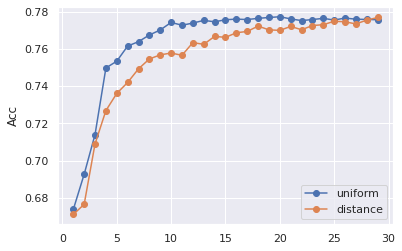

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

cv = KFold(n_splits = 5, shuffle = True) # shuffle = False si hay dimensión temporal 

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
       for train_fold, test_fold in cv.split(train):
          # División train test aleatoria
          f_train = train.loc[train_fold]
          f_test = train.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['class'], axis=1), 
                               y = f_train['class'])
          y_pred = knn.predict(X = f_test.drop(['class'], axis = 1))
          # evaluación del modelo
          acc = accuracy_score(f_test['class'], y_pred)
          fold_accuracy.append(acc)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
   plt.ylabel('Acc')      
    

plt.legend()
plt.show() 


# 2. Model Execution



Once we have identified the best parameterization we will go on to make an execution of the model and we will graph its results.

## K-nearest neighbors algorithm

In [ ]:
# constructor
n_neighbors = 3
weights = 'distance'
knn = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights) 
# fit and predict
knn.fit(X = train[['Negative','Compound']], y = train['class'])
y_pred = knn.predict(X = test[['Negative','Compound']])
acc = accuracy_score(test['class'], y_pred)
print ('Acc', acc)

Acc 0.7268325487558843


We show the solution using Voronoi Diagrams


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .05  # step size in the mesh

X = train[['Negative','Compound']].values
y = train['class'].values


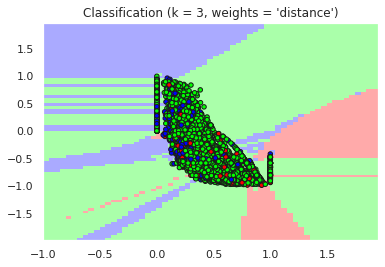

In [ ]:

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
             edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()
                         

Finally, we obtain the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.06205251 0.85680191 0.08114558]
 [0.03030303 0.88993382 0.07976315]
 [0.02590267 0.76373626 0.21036107]]


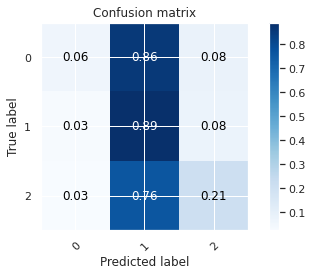

In [ ]:
target_name=np.array(['0', '1', '2'], dtype='<U10')
plot_confusion_matrix(test['class'], y_pred, classes=target_name, normalize=True,
                      title='Confusion matrix')
  

## Naive Bayes algorithm

In [ ]:
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB



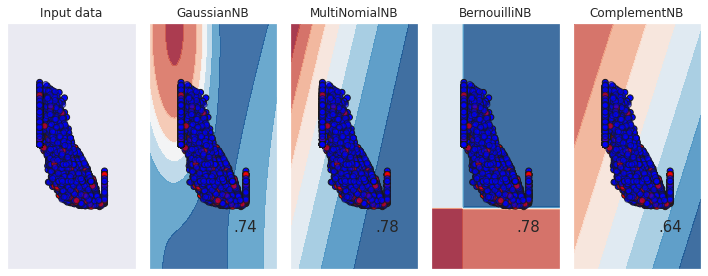

In [ ]:
# plotting variables
h = .02  # step size in the mesh
i = 1
figure = plt.figure(figsize=(10, 4))

# classifiers
names = ["GaussianNB", "MultiNomialNB", 'BernouilliNB', 'ComplementNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB()]

# scale
X = MinMaxScaler().fit_transform(X)
# train and test
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)


# prepare visualization
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
         edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
              edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

for name, clf in zip(names, classifiers):
  ax = plt.subplot(1, len(classifiers) + 1, i)
  
  # FIT THE MODEL
  clf.fit(X_train, y_train)
  # PREDIT AND SCORE  
  score = clf.score(X_test, y_test) #Returns the mean accuracy on the given test data and labels.
  
  
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

  # Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
             edgecolors='k')
  # Plot the testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
             edgecolors='k', alpha=0.6)

  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(name)
  ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
          size=15, horizontalalignment='right')
  i += 1
  
plt.tight_layout()
plt.show()

In [ ]:
clf = GaussianNB() 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print ('Acc', acc)

Acc 0.7402017291066283


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.         0.89108911 0.10891089]
 [0.         0.86676509 0.13323491]
 [0.         0.60608774 0.39391226]]


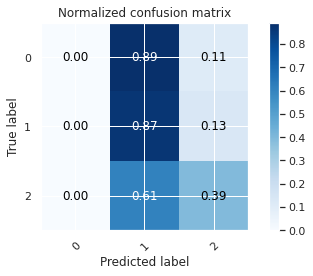

In [ ]:
plot_confusion_matrix(y_test, y_pred , classes = unique_labels(y_test, y_pred), normalize=True,
                      title='Normalized confusion matrix')